In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# cache_dir indicates where to download data. I specified . which means current directory
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228827136/228813984 [==============================] - 22s 0us/step


In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
# list of all file having format jpg; [:5] means top 5
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
# list of roses images
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

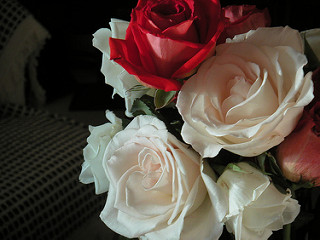

In [10]:
# oprn rose image
PIL.Image.open(str(roses[1]))

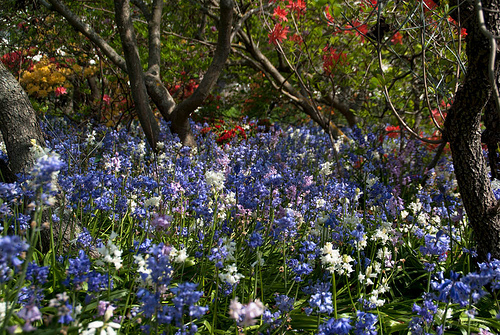

In [14]:
# oprn tulip image
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [15]:
# flower dictionary
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [16]:
# assigning number to class name 

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [19]:
# reading file path
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [21]:
# cv2 don't take windows path as argument it takes string path as argument
img= cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [22]:
# resize image
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [24]:
X,y= [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        # resizing all images
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        # sending flower label in y
        y.append(flowers_labels_dict[flower_name])

In [29]:
# y unique values
np.unique(y)

array([0, 1, 2, 3, 4])

In [30]:
# converting X, y to numpy array

X = np.array(X)
y = np.array(y)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)

In [32]:
# scaling data
X_train_scaled= X_train / 255
X_test_scaled= X_test / 255

In [39]:
model= Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(5) # by default activation is linear
])

In [40]:
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer='adam',
             metrics=['accuracy'])

In [42]:
model.fit(X_train_scaled, y_train, epochs=10, verbose=1)

Epoch 1/10
86/86 [==============================] - 116s 1s/step - loss: 1.1054 - accuracy: 0.5690
Epoch 2/10
86/86 [==============================] - 110s 1s/step - loss: 0.9147 - accuracy: 0.6544
Epoch 3/10
86/86 [==============================] - 109s 1s/step - loss: 0.7566 - accuracy: 0.7133
Epoch 4/10
86/86 [==============================] - 110s 1s/step - loss: 0.5698 - accuracy: 0.7871
Epoch 5/10
86/86 [==============================] - 110s 1s/step - loss: 0.3607 - accuracy: 0.8844
Epoch 6/10
86/86 [==============================] - 115s 1s/step - loss: 0.2463 - accuracy: 0.9219
Epoch 7/10
86/86 [==============================] - 133s 2s/step - loss: 0.1359 - accuracy: 0.9578
Epoch 8/10
86/86 [==============================] - 113s 1s/step - loss: 0.1028 - accuracy: 0.9720
Epoch 9/10
86/86 [==============================] - 108s 1s/step - loss: 0.0510 - accuracy: 0.9895
Epoch 10/10
86/86 [==============================] - 107s 1s/step - loss: 0.0203 - accuracy: 0.9978


In [44]:
model.fit(X_test_scaled, y_test, verbose=1)

29/29 [==============================] - 57s 1s/step - loss: 1.2101 - accuracy: 0.6024


In [45]:
prediction= model.predict(X_test_scaled)
prediction

array([[-0.10833339,  4.039682  , -1.2610066 , -1.8849351 , -0.91320693],
       [ 4.512496  ,  0.21624903, -2.201893  , -2.0820055 ,  1.4343107 ],
       [-0.12993488,  1.0260203 ,  4.8835673 , -2.912647  , -1.2907773 ],
       ...,
       [-0.34454536, -0.6108433 ,  2.2015631 ,  2.2410219 ,  0.17992127],
       [ 1.8834054 ,  0.0876696 ,  0.7124519 , -1.6854614 ,  0.32435927],
       [-0.3330166 , -2.3438082 ,  1.7972685 ,  2.157267  ,  2.1278331 ]],
      dtype=float32)

In [48]:
# soft can also convert array to probability
score= tf.nn.softmax(prediction[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.01532793, 0.9703841 , 0.00484043, 0.00259367, 0.0068538 ],
      dtype=float32)>

In [49]:
# gives position of highest value
np.argmax(score)

1

In [50]:
y_test[0]

1

### Data augmentation

In [59]:
data_augmentation= keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode='horizontal', input_shape=(180,180, 3)),
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomRotation(0.1)
])

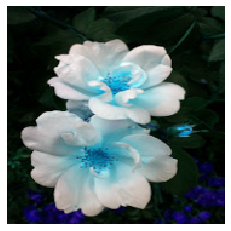

In [52]:
# plotting image without augmentation
plt.axis('off')
plt.imshow(X[0])

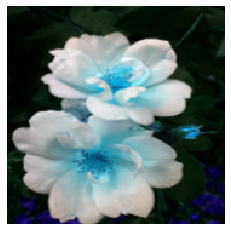

In [54]:
# plotting image with augmentation
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [60]:
model= Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.2),
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

In [61]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [63]:
model.fit(X_train_scaled, y_train, epochs=10, verbose=1)

Epoch 1/10
86/86 [==============================] - 149s 2s/step - loss: 1.2426 - accuracy: 0.4651
Epoch 2/10
86/86 [==============================] - 146s 2s/step - loss: 1.0372 - accuracy: 0.5883
Epoch 3/10
86/86 [==============================] - 140s 2s/step - loss: 0.9545 - accuracy: 0.6272
Epoch 4/10
86/86 [==============================] - 137s 2s/step - loss: 0.8997 - accuracy: 0.6624
Epoch 5/10
86/86 [==============================] - 129s 2s/step - loss: 0.8446 - accuracy: 0.6828
Epoch 6/10
86/86 [==============================] - 131s 2s/step - loss: 0.8014 - accuracy: 0.6999
Epoch 7/10
86/86 [==============================] - 128s 1s/step - loss: 0.7908 - accuracy: 0.7013
Epoch 8/10
86/86 [==============================] - 131s 2s/step - loss: 0.7506 - accuracy: 0.7078
Epoch 9/10
86/86 [==============================] - 143s 2s/step - loss: 0.7057 - accuracy: 0.7347
Epoch 10/10
86/86 [==============================] - 131s 2s/step - loss: 0.7002 - accuracy: 0.7322


In [64]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 25s 403ms/step - loss: 0.7523 - accuracy: 0.7070


[0.7522788643836975, 0.7069717049598694]